# Dataset


<a href="https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset">Glioma Grading Clinical and Mutation Features</a>


<a href="https://github.com/uci-ml-repo/ucimlrepo/tree/main">github: ucimlrepo package</a>



Citation: Tasci, E., Zhuge, Y., Kaur, H., Camphausen, K., & Krauze, A. V. (2022). Hierarchical Voting-Based Feature Selection and Ensemble Learning Model Scheme for Glioma Grading with Clinical and Molecular Characteristics. International Journal of Molecular Sciences, 23(22), 14155.


# 1. Import

In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

# dotenv import
from dotenv import load_dotenv
import os


# Datasets
from ucimlrepo import fetch_ucirepo, list_available_datasets # Libraries for Glioma dataset (https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset)
from chembl_webresource_client.new_client import new_client # Libraries for Chembl (https://github.com/chembl/chembl_webresource_client)

# Database Connection
import sqlalchemy # generate tabular data-set; pip install sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import text



# 2. Glioma Grading Clinical and Mutation Features

## 2.1 Glioma Dataset - Load Data

In [2]:
!dir

 Datentr„ger in Laufwerk C: ist Windows
 Volumeseriennummer: 20BD-6958

 Verzeichnis von C:\Users\andre\Documents\IRONHACK\UNIT_4\Mini_Project_SQL\Mini_Project_SQL\notebooks

13.03.2024  01:03    <DIR>          .
12.03.2024  18:19    <DIR>          ..
11.03.2024  17:47    <DIR>          .ipynb_checkpoints
13.03.2024  01:03           114.961 Mini_Project_SQL.ipynb
               1 Datei(en),        114.961 Bytes
               3 Verzeichnis(se), 703.678.201.856 Bytes frei


In [3]:
# fetch glioma dataset from https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset
glioma_feat = fetch_ucirepo(id=759) 

In [4]:
type(glioma_feat)

ucimlrepo.dotdict.dotdict

In [5]:
# convert target and info data as pandas dataframes 
df_target = glioma_feat.data.original

df_info = pd.read_csv("../data/raw/glioma+grading+clinical+and+mutation+features+dataset/TCGA_GBM_LGG_Mutations_all.csv", usecols=['Case_ID', 'Primary_Diagnosis'])

## 2.2 Glioma Dataset - Overview 

In [6]:
# Display first 5 rows of target data
df_target.head()

,Case_ID,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
0,TCGA-DU-8164,0,51.30,white,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-QH-A6CY,0,38.72,white,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,TCGA-HW-A5KM,0,35.17,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-E1-A7YE,1,32.78,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,TCGA-S9-A6WG,0,31.51,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Display first 5 rows of info data
df_info.head()

,Case_ID,Primary_Diagnosis
0,TCGA-DU-8164,"Oligodendroglioma, NOS"
1,TCGA-QH-A6CY,Mixed glioma
2,TCGA-HW-A5KM,"Astrocytoma, NOS"
3,TCGA-E1-A7YE,"Astrocytoma, anaplastic"
4,TCGA-S9-A6WG,"Astrocytoma, anaplastic"


In [8]:
# Dataframe structure
print("df_target no of rows:", df_target.shape[0], "and no of columns:", df_target.shape[1])
print("df_info no of rows:", df_info.shape[0], "and no of columns:", df_info.shape[1])

df_target no of rows: 839 and no of columns: 25
df_info no of rows: 862 and no of columns: 2


In [9]:
# Column Names
df_target.columns

Index(['Case_ID', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA', 'Grade'],
      dtype='object')

In [10]:
# Info stats
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Case_ID           839 non-null    object 
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    object 
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [11]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Case_ID            862 non-null    object
 1   Primary_Diagnosis  862 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB


In [12]:
glioma_feat.keys()

dict_keys(['data', 'metadata', 'variables'])

In [13]:
# Glioma Metadata
glioma_feat['metadata'].keys()

dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])

In [14]:
# Abstract
glioma_feat.metadata['abstract']

'Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.    In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.  The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading process to improve performance and reduce costs.  '

In [15]:
# access metadata
print(glioma_feat.metadata.uci_id)
print(glioma_feat.metadata.num_instances)
print(glioma_feat.metadata.additional_info.summary)

759
839
None


In [16]:
display(glioma_feat.variables['name'])

0                Grade
1               Gender
2     Age_at_diagnosis
3                 Race
4                 IDH1
5                 TP53
6                 ATRX
7                 PTEN
8                 EGFR
9                  CIC
10               MUC16
11              PIK3CA
12                 NF1
13              PIK3R1
14               FUBP1
15                 RB1
16              NOTCH1
17                BCOR
18               CSMD3
19             SMARCA4
20              GRIN2A
21                IDH2
22                FAT4
23              PDGFRA
Name: name, dtype: object

In [17]:
display(glioma_feat.variables['description'])

0     Glioma grade class information (0 = "LGG"; 1 =...
1                     Gender (0 = "male"; 1 = "female")
2     Age at diagnosis with the calculated number of...
3     Race  (0 = "white";  1 = "black or african Ame...
4     isocitrate dehydrogenase (NADP(+))1 (0 = NOT_M...
5      tumor protein p53 (0 = NOT_MUTATED; 1 = MUTATED)
6     ATRX chromatin remodeler (0 = NOT_MUTATED; 1 =...
7     phosphatase and tensin homolog (0 = NOT_MUTATE...
8     epidermal growth factor receptor (0 = NOT_MUTA...
9     capicua transcriptional repressor (0 = NOT_MUT...
10    mucin 16, cell surface associated (0 = NOT_MUT...
11    phosphatidylinositol-4,5-bisphosphate 3-kinase...
12       neurofibromin 1 (0 = NOT_MUTATED; 1 = MUTATED)
13    phosphoinositide-3-kinase regulatory subunit 1...
14    far upstream element binding protein 1 (0 = NO...
15    RB transcriptional corepressor 1 (0 = NOT_MUTA...
16      notch receptor 1 (0 = NOT_MUTATED; 1 = MUTATED)
17      BCL6 corepressor (0 = NOT_MUTATED; 1 = M

In [18]:
glioma_feat.data.headers

Index(['Case_ID', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA', 'Grade'],
      dtype='object')

In [19]:
glioma_feat.metadata['data_url']

'https://archive.ics.uci.edu/static/public/759/data.csv'

## 2.3 Glioma Dataset - Unique Values

In [20]:
# Unique Values of df_target
df_target.nunique()

Case_ID             839
Gender                2
Age_at_diagnosis    766
Race                  4
IDH1                  2
TP53                  2
ATRX                  2
PTEN                  2
EGFR                  2
CIC                   2
MUC16                 2
PIK3CA                2
NF1                   2
PIK3R1                2
FUBP1                 2
RB1                   2
NOTCH1                2
BCOR                  2
CSMD3                 2
SMARCA4               2
GRIN2A                2
IDH2                  2
FAT4                  2
PDGFRA                2
Grade                 2
dtype: int64

In [21]:
df_target['Grade'].unique()

array([0, 1], dtype=int64)

In [22]:
df_target['EGFR'].unique()

array([0, 1], dtype=int64)

In [23]:
# Unique Values of df_target
df_info.nunique()

Case_ID              862
Primary_Diagnosis      7
dtype: int64

In [24]:
df_info['Primary_Diagnosis'].unique()

array(['Oligodendroglioma, NOS', 'Mixed glioma', 'Astrocytoma, NOS',
       'Astrocytoma, anaplastic', 'Oligodendroglioma, anaplastic', '--',
       'Glioblastoma'], dtype=object)

In [25]:
df_info['Primary_Diagnosis'].value_counts()

Primary_Diagnosis
Glioblastoma                     360
Astrocytoma, anaplastic          129
Mixed glioma                     128
Oligodendroglioma, NOS           108
Oligodendroglioma, anaplastic     75
Astrocytoma, NOS                  58
--                                 4
Name: count, dtype: int64

In [26]:
df_info[df_info['Primary_Diagnosis'] == "--"]

,Case_ID,Primary_Diagnosis
41,TCGA-R8-A6YH,--
671,TCGA-28-2501,--
706,TCGA-28-2510,--
794,TCGA-16-1048,--


In [27]:
df_info.nunique()

Case_ID              862
Primary_Diagnosis      7
dtype: int64

In [28]:
# Check if Case_ID from df_target are contained in Case_ID of df_info --> important to make the Case_ID a foreign key in the mysql gliomo_db target table
all_exist = df_target['Case_ID'].isin(df_info['Case_ID']).all()
all_exist

True

## 2.4 Glioma Dataset - Descriptive Statistics

In [29]:
df_target.describe()

,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.418355,50.935411,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,0.116806,0.087008,...,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222,0.419547
std,0.493583,15.702339,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,0.321380,0.282015,...,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889,0.493779
min,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,62.800000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89.290000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_target.describe(include='object')

,Case_ID,Race
count,839,839
unique,839,4
top,TCGA-DU-8164,white
freq,1,765


In [31]:
df_info.describe()

,Case_ID,Primary_Diagnosis
count,862,862
unique,862,7
top,TCGA-DU-8164,Glioblastoma
freq,1,360


## 2.5 Glioma Dataset - Cleaning

In [32]:
df_target.columns

Index(['Case_ID', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA', 'Grade'],
      dtype='object')

In [33]:
# Column names To lower case and Replace White spaces
df_target = df_target.rename(columns={col: col.lower().strip().replace(" ", "_") for col in df_target.columns})
df_target.columns

Index(['case_id', 'gender', 'age_at_diagnosis', 'race', 'idh1', 'tp53', 'atrx',
       'pten', 'egfr', 'cic', 'muc16', 'pik3ca', 'nf1', 'pik3r1', 'fubp1',
       'rb1', 'notch1', 'bcor', 'csmd3', 'smarca4', 'grin2a', 'idh2', 'fat4',
       'pdgfra', 'grade'],
      dtype='object')

In [34]:
df_info.columns

Index(['Case_ID', 'Primary_Diagnosis'], dtype='object')

In [35]:
df_info = df_info.rename(columns={col: col.lower().strip().replace(" ", "_") for col in df_info.columns})
df_info.columns

Index(['case_id', 'primary_diagnosis'], dtype='object')

## 2. Glioma Dataset - Write to CSV

In [36]:
df_target.to_csv('../data/cleaned/df_target.csv')

In [37]:
df_info.to_csv('../data/cleaned/df_info.csv')

# 3. CHEMBL DATA

## 3.1 CHEMBL DATA - Load Data

In [38]:
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


In [39]:
# Get Molecule (e.g. EGFR)
target = new_client.target
egfr = target.filter(target_synonym__icontains='EGFR')[0]

egfr

{'cross_references': [{'xref_id': 'P00533',
   'xref_name': None,
   'xref_src': 'canSAR-Target'},
  {'xref_id': 'Epidermal_growth_factor_receptor',
   'xref_name': None,
   'xref_src': 'Wikipedia'},
  {'xref_id': 'NBK23179',
   'xref_name': 'Epidermal growth factor receptor',
   'xref_src': 'MICAD'},
  {'xref_id': 'NBK23211',
   'xref_name': 'Epidermal growth factor receptor',
   'xref_src': 'MICAD'},
  {'xref_id': 'NBK23370',
   'xref_name': 'Epidermal growth factor receptor (EGFR, HER1/erbB-1)',
   'xref_src': 'MICAD'},
  {'xref_id': 'NBK23376',
   'xref_name': 'Epidermal growth factor receptor (EGFR)',
   'xref_src': 'MICAD'}],
 'organism': 'Homo sapiens',
 'pref_name': 'Epidermal growth factor receptor erbB1',
 'species_group_flag': False,
 'target_chembl_id': 'CHEMBL203',
 'target_components': [{'accession': 'P00533',
   'component_description': 'Epidermal growth factor receptor',
   'component_id': 147,
   'component_type': 'PROTEIN',
   'relationship': 'SINGLE PROTEIN',
   'tar

In [40]:
egfr.keys()

dict_keys(['cross_references', 'organism', 'pref_name', 'species_group_flag', 'target_chembl_id', 'target_components', 'target_type', 'tax_id'])

## 3.2 CHEMBL DATA - Overview 

# 4. Tabular Data Set-up

## 4.1 Create INSERT Statement

## 4.2 Create a MySQL connection:

In [46]:
# Load environment variables from .env file
load_dotenv()

# Get database credentials from environment variables
db_username = os.getenv("DB_USERNAME")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_name = os.getenv("DB_NAME")

In [47]:
# Connection string
connection_string = f'mysql+mysqlconnector://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}'

In [48]:
# MySQL connection
engine = create_engine(connection_string)

### 4.2.1 Get Tables

In [150]:
# target table of glioma_db
with engine.connect() as conn:
    # Run SQL query
    result = conn.execute(text("""
        SELECT *
        FROM glioma_db.target;
    """))

    # Fetch all rows
    tuple_result = result.fetchall()

# Retrieve column names from the result set
columns = result.keys()

# Convert fetched rows to a Pandas DataFrame
df_target_db = pd.DataFrame(tuple_result, columns=columns)
df_target_db.head()

,target_id,case_id,gender,age_at_diagnosis,race,idh1,tp53,atrx,pten,egfr,...,rb1,notch1,bcor,csmd3,smarca4,grin2a,idh2,fat4,pdgfra,grade
0,1,TCGA-DU-8164,0,51.30,white,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,TCGA-RY-A845,1,40.02,white,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,TCGA-QH-A6CY,0,38.72,white,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,TCGA-HT-A61A,1,20.98,white,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,TCGA-DU-8167,1,69.16,white,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# info table of glioma_db
with engine.connect() as conn:
    # Run SQL query
    result = conn.execute(text("""
        SELECT *
        FROM glioma_db.target;
    """))

    # Fetch all rows
    tuple_result = result.fetchall()

# Retrieve column names from the result set
columns = result.keys()

# Convert fetched rows to a Pandas DataFrame
df_info_db = pd.DataFrame(tuple_result, columns=columns)
df_info_db.head()

,target_id,case_id,gender,age_at_diagnosis,race,idh1,tp53,atrx,pten,egfr,...,rb1,notch1,bcor,csmd3,smarca4,grin2a,idh2,fat4,pdgfra,grade
0,1,TCGA-DU-8164,0,51.30,white,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,TCGA-RY-A845,1,40.02,white,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,TCGA-QH-A6CY,0,38.72,white,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,TCGA-HT-A61A,1,20.98,white,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,TCGA-DU-8167,1,69.16,white,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2.2 Join - Tables

In [141]:
with engine.connect() as conn:
    # Run SQL query
    result = conn.execute(text("""
        SELECT tar.*, inf.primary_diagnosis
        FROM glioma_db.info as inf
        RIGHT JOIN glioma_db.target as tar
        ON inf.case_id = tar.case_id;
    """))

    # Fetch all rows
    tuple_result = result.fetchall()

# Retrieve column names from the result set
columns = result.keys()

# Convert fetched rows to a Pandas DataFrame
df_target_info = pd.DataFrame(tuple_result, columns=columns)

In [142]:
df_target_info

,target_id,case_id,gender,age_at_diagnosis,race,idh1,tp53,atrx,pten,egfr,...,notch1,bcor,csmd3,smarca4,grin2a,idh2,fat4,pdgfra,grade,primary_diagnosis
0,1,TCGA-DU-8164,0,51.30,white,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Oligodendroglioma, NOS"
1,2,TCGA-RY-A845,1,40.02,white,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Mixed glioma
2,3,TCGA-QH-A6CY,0,38.72,white,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mixed glioma
3,4,TCGA-HT-A61A,1,20.98,white,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Oligodendroglioma, NOS"
4,5,TCGA-DU-8167,1,69.16,white,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Mixed glioma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,835,TCGA-4W-AA9S,0,69.94,black or african american,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Glioblastoma
835,836,TCGA-19-2629,0,60.94,white,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Glioblastoma
836,837,TCGA-RR-A6KC,0,55.59,black or african american,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Glioblastoma
837,838,TCGA-06-0237,1,75.94,white,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,Glioblastoma


### 4.2.3 Count Grade by Gender AND Grade

In [144]:
with engine.connect() as conn:
    # Run SQL query
    result = conn.execute(text("""
        SELECT 
            CASE 
                WHEN gender = '1' THEN 'Female'
                WHEN gender = '0' THEN 'Male'
            END as gender,
            grade,
            COUNT(grade) AS count_grade
        FROM glioma_db.target
        GROUP BY gender, grade
        ORDER BY gender, grade;
    """))

    # Fetch all rows
    tuple_result = result.fetchall()

# Retrieve column names from the result set
columns = result.keys()

# Convert fetched rows to a Pandas DataFrame
df_count_grade = pd.DataFrame(tuple_result, columns=columns)

In [145]:
df_count_grade

,gender,grade,count_grade
0,Female,0,216
1,Female,1,135
2,Male,0,271
3,Male,1,217


### 4.2.4 Frequency of Mutations by Gender and Grade

In [148]:
with engine.connect() as conn:
    # Run SQL query
    result = conn.execute(text("""
        SELECT 
            CASE 
                WHEN gender = '1' THEN 'Female'
                WHEN gender = '0' THEN 'Male'
            END as gender,
            grade,
            AVG(idh1) AS avg_idh1,
            AVG(tp53) AS avg_tp53,
            AVG(atrx) AS avg_atrx,
            AVG(pten) AS avg_pten,
            AVG(egfr) AS avg_egfr,
            AVG(cic) AS avg_cic,
            AVG(muc16) AS avg_muc16,
            AVG(pik3ca) AS avg_pik3ca,
            AVG(nf1) AS avg_nf1,
            AVG(pik3r1) AS avg_pik3r1,
            AVG(fubp1) AS avg_fubp1,
            AVG(rb1) AS avg_rb1,
            AVG(notch1) AS avg_notch1,
            AVG(bcor) AS avg_bcor,
            AVG(csmd3) AS avg_csmd3,
            AVG(smarca4) AS avg_smarca4,
            AVG(grin2a) AS avg_grin2a,
            AVG(idh2) AS avg_idh2,
            AVG(fat4) AS avg_fat4,
            AVG(pdgfra) AS avg_pdgfra
        FROM glioma_db.target
        GROUP BY gender, grade
        ORDER BY gender, grade;
    """))

    # Fetch all rows
    rows = result.fetchall()

# Retrieve column names from the result set
columns = result.keys()

df_avg_mut = pd.DataFrame(rows, columns=columns)

In [149]:
df_avg_mut

,gender,grade,avg_idh1,avg_tp53,avg_atrx,avg_pten,avg_egfr,avg_cic,avg_muc16,avg_pik3ca,...,avg_fubp1,avg_rb1,avg_notch1,avg_bcor,avg_csmd3,avg_smarca4,avg_grin2a,avg_idh2,avg_fat4,avg_pdgfra
0,Female,0,0.7917,0.4537,0.3935,0.0417,0.0694,0.2454,0.0926,0.0741,...,0.0833,0.0185,0.0741,0.0463,0.0370,0.0417,0.0185,0.0463,0.0278,0.0185
1,Female,1,0.0593,0.3556,0.1185,0.3333,0.2000,0.0148,0.1704,0.1037,...,0.0148,0.1111,0.0000,0.0593,0.0444,0.0148,0.0519,0.0074,0.0593,0.0519
2,Male,0,0.7749,0.5055,0.3616,0.0590,0.0590,0.1993,0.0775,0.0849,...,0.0923,0.0074,0.0812,0.0258,0.0148,0.0517,0.0111,0.0406,0.0185,0.0074
3,Male,1,0.0691,0.2995,0.0829,0.3272,0.2488,0.0092,0.1567,0.0922,...,0.0000,0.0876,0.0000,0.0184,0.0415,0.0092,0.0599,0.0046,0.0184,0.0415


In [104]:
df_avg_mut.columns

Index(['gender', 'grade', 'avg_idh1', 'avg_tp53', 'avg_atrx', 'avg_pten',
       'avg_egfr', 'avg_cic', 'avg_muc16', 'avg_pik3ca', 'avg_nf1',
       'avg_pik3r1', 'avg_fubp1', 'avg_rb1', 'avg_notch1', 'avg_bcor',
       'avg_csmd3', 'avg_smarca4', 'avg_grin2a', 'avg_idh2', 'avg_fat4',
       'avg_pdgfra'],
      dtype='object')

In [108]:
avg_mut_columns = ['avg_idh1', 'avg_tp53', 'avg_atrx', 'avg_pten',
                   'avg_egfr', 'avg_cic', 'avg_muc16', 'avg_pik3ca', 'avg_nf1',
                   'avg_pik3r1', 'avg_fubp1', 'avg_rb1', 'avg_notch1', 'avg_bcor',
                   'avg_csmd3', 'avg_smarca4', 'avg_grin2a', 'avg_idh2', 'avg_fat4',
                   'avg_pdgfra']
avg_mut_columns

['avg_idh1',
 'avg_tp53',
 'avg_atrx',
 'avg_pten',
 'avg_egfr',
 'avg_cic',
 'avg_muc16',
 'avg_pik3ca',
 'avg_nf1',
 'avg_pik3r1',
 'avg_fubp1',
 'avg_rb1',
 'avg_notch1',
 'avg_bcor',
 'avg_csmd3',
 'avg_smarca4',
 'avg_grin2a',
 'avg_idh2',
 'avg_fat4',
 'avg_pdgfra']

#### 4.2.4.1 Visualization

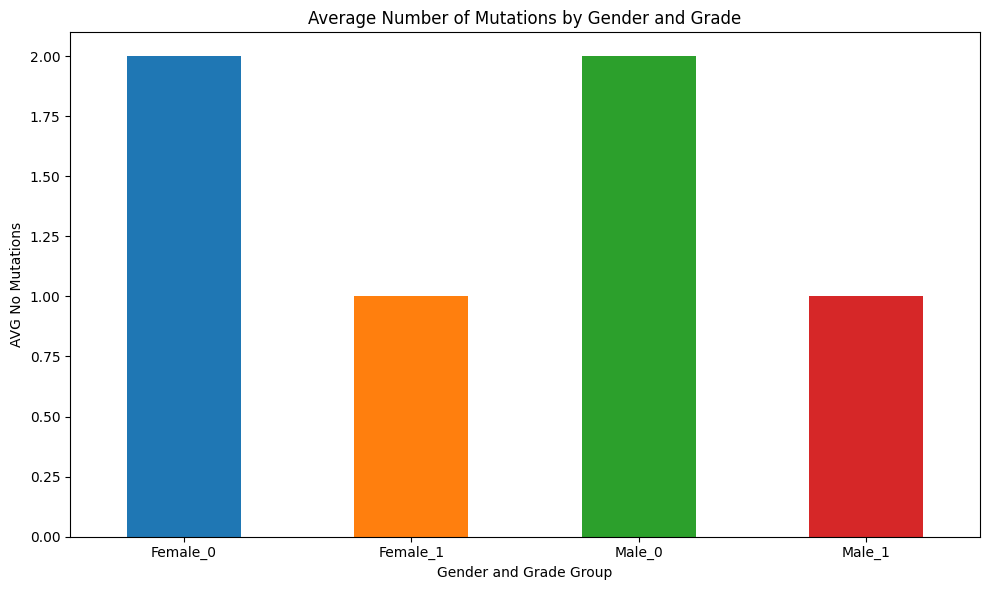

In [116]:
# DataFrame with mutations data

# Combine gender and grade to create groups
df_avg_mut['group'] = df_avg_mut['gender'] + '_' + df_avg_mut['grade'].astype(str)


# Sum mutations across all columns
df_avg_mut['total_mutations'] = df_avg_mut[avg_mut_columns].sum(axis=1).astype(int)

# Group the data by 'group' and sum the mutation counts
grouped_data = df_avg_mut.groupby('group')['total_mutations'].sum()

# Define colors for each mutation column
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color=colors)
plt.title('Average Number of Mutations by Gender and Grade')
plt.xlabel('Gender and Grade Group')
plt.ylabel('AVG No Mutations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [121]:
# Combine gender and grade to create groups
df_avg_mut['group'] = df_avg_mut['gender'] + '_' + df_avg_mut['grade'].astype(str)

In [133]:
# Change to long format
df_avg_mut_long = df_avg_mut.melt(id_vars=['group'], value_vars=avg_mut_columns, var_name='Mutation', value_name='Total Mutations')
df_avg_mut_long

,group,Mutation,Total Mutations
0,Female_0,avg_idh1,0.7917
1,Female_1,avg_idh1,0.0593
2,Male_0,avg_idh1,0.7749
3,Male_1,avg_idh1,0.0691
4,Female_0,avg_tp53,0.4537
...,...,...,...
75,Male_1,avg_fat4,0.0184
76,Female_0,avg_pdgfra,0.0185
77,Female_1,avg_pdgfra,0.0519
78,Male_0,avg_pdgfra,0.0074


In [185]:
# Convert 'Total Mutations' column to numeric
df_avg_mut_long['Total Mutations'] = pd.to_numeric(df_avg_mut_long['Total Mutations'], errors='coerce')

# Initialize an empty list to store the top 5 mutations per group
top_5_mutations_list = []

# Iterate over each group
for group, group_data in df_avg_mut_long.groupby('group'):
    # Sort the group data by 'Total Mutations' in descending order
    sorted_group_data = group_data.sort_values(by='Total Mutations', ascending=False)
    # Take the top 5 rows with the highest 'Total Mutations' values
    top_5_mutations = sorted_group_data.head(5)
    # Append the top 5 mutations for this group to the list
    top_5_mutations_list.append(top_5_mutations)

# Concatenate the list of DataFrames into a single DataFrame
df_avg_mut_long_max = pd.concat(top_5_mutations_list, ignore_index=True)
display(df_avg_mut_long_max)



,group,Mutation,Total Mutations
0,Female_0,avg_idh1,0.7917
1,Female_0,avg_tp53,0.4537
2,Female_0,avg_atrx,0.3935
3,Female_0,avg_cic,0.2454
4,Female_0,avg_muc16,0.0926
5,Female_1,avg_tp53,0.3556
6,Female_1,avg_pten,0.3333
7,Female_1,avg_egfr,0.2000
8,Female_1,avg_muc16,0.1704
9,Female_1,avg_nf1,0.1259


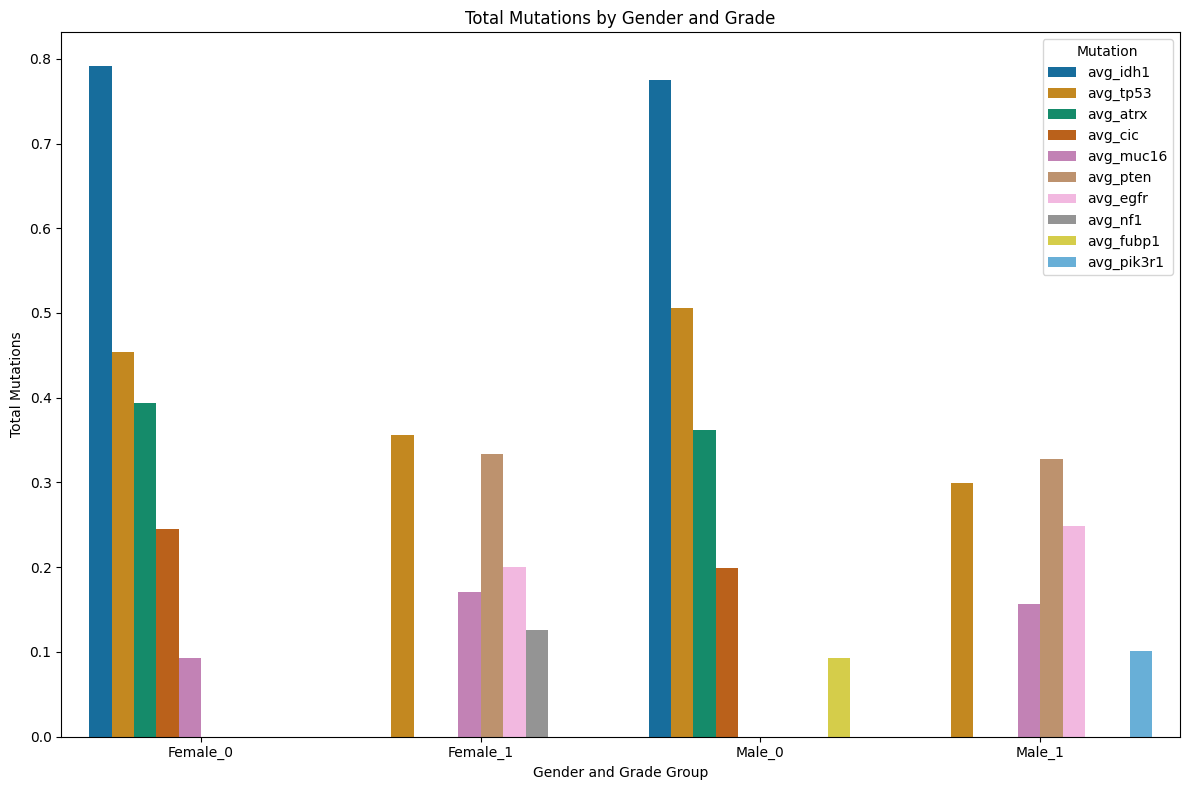

In [214]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_avg_mut_long_max, x='group', y='Total Mutations', hue='Mutation', palette='colorblind', dodge=True)
plt.title('Total Mutations by Gender and Grade')
plt.xlabel('Gender and Grade Group')
plt.ylabel('Total Mutations')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


